<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/QuantumSubroutineAlgorithms_QAA_Grok_mkbahk_20250407.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-aer==0.15.1
%pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 5.8 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=1f6d212390fb58762c5efcca829462c1e313fcc599cd384fe4b6f18a1124d229
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 92.4 MB/s eta 0:00:00
  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-qh8ih4mf
  Running comman

In [12]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, assemble
from qiskit.quantum_info import Statevector, Operator
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector
from qiskit_textbook.tools import array_to_latex
from qiskit_aer import Aer, AerSimulator
from IPython.display import display, Math
import numpy as np

from qiskit.primitives import Sampler

In [50]:
# 큐비트 수 설정 (3큐비트 시스템)
n_qubits = 3

# 양자 회로 초기화: 큐비트 수 + 측정을 위한 클래식 비트
qc = QuantumCircuit(n_qubits, n_qubits)

# 초기 상태 준비: 모든 큐비트에 하다마드 게이트 적용하여 균일한 중첩 상태 생성
# |000> -> (|000> + |001> + |010> +... +|111>)/3
for i in range(n_qubits):
    qc.h(i)
###for

# 오라클 정의: 목표 상태 |11>을 식별
# |111> 상태에 -1 위상 적용 (즉, |111> -> -|111>)
oracle = np.identity(2**n_qubits)  # 8x8 단위 행렬로 초기화
oracle[7, 7] = -1  # |11> 상태(인덱스 3)에 -1 적용
qc.append(Operator(oracle), range(n_qubits))  # 오라클을 회로에 추가

# 확산 연산자(Diffuser) 정의
# 초기 상태 |s>를 제외한 모든 상태의 진폭을 반전
diffuser = np.ones((2**n_qubits, 2**n_qubits)) * (2 / (2**n_qubits))  # 2|s><s| 항
diffuser -= np.identity(2**n_qubits)  # -I 항
qc.append(Operator(diffuser), range(n_qubits))  # 확산 연산자를 회로에 추가

# 측정: 모든 큐비트를 측정하여 결과를 클래식 레지스터에 저장
qc.measure(range(n_qubits), range(n_qubits))

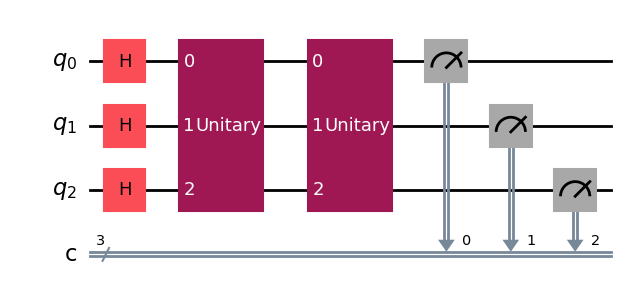

In [51]:
qc.draw('mpl')

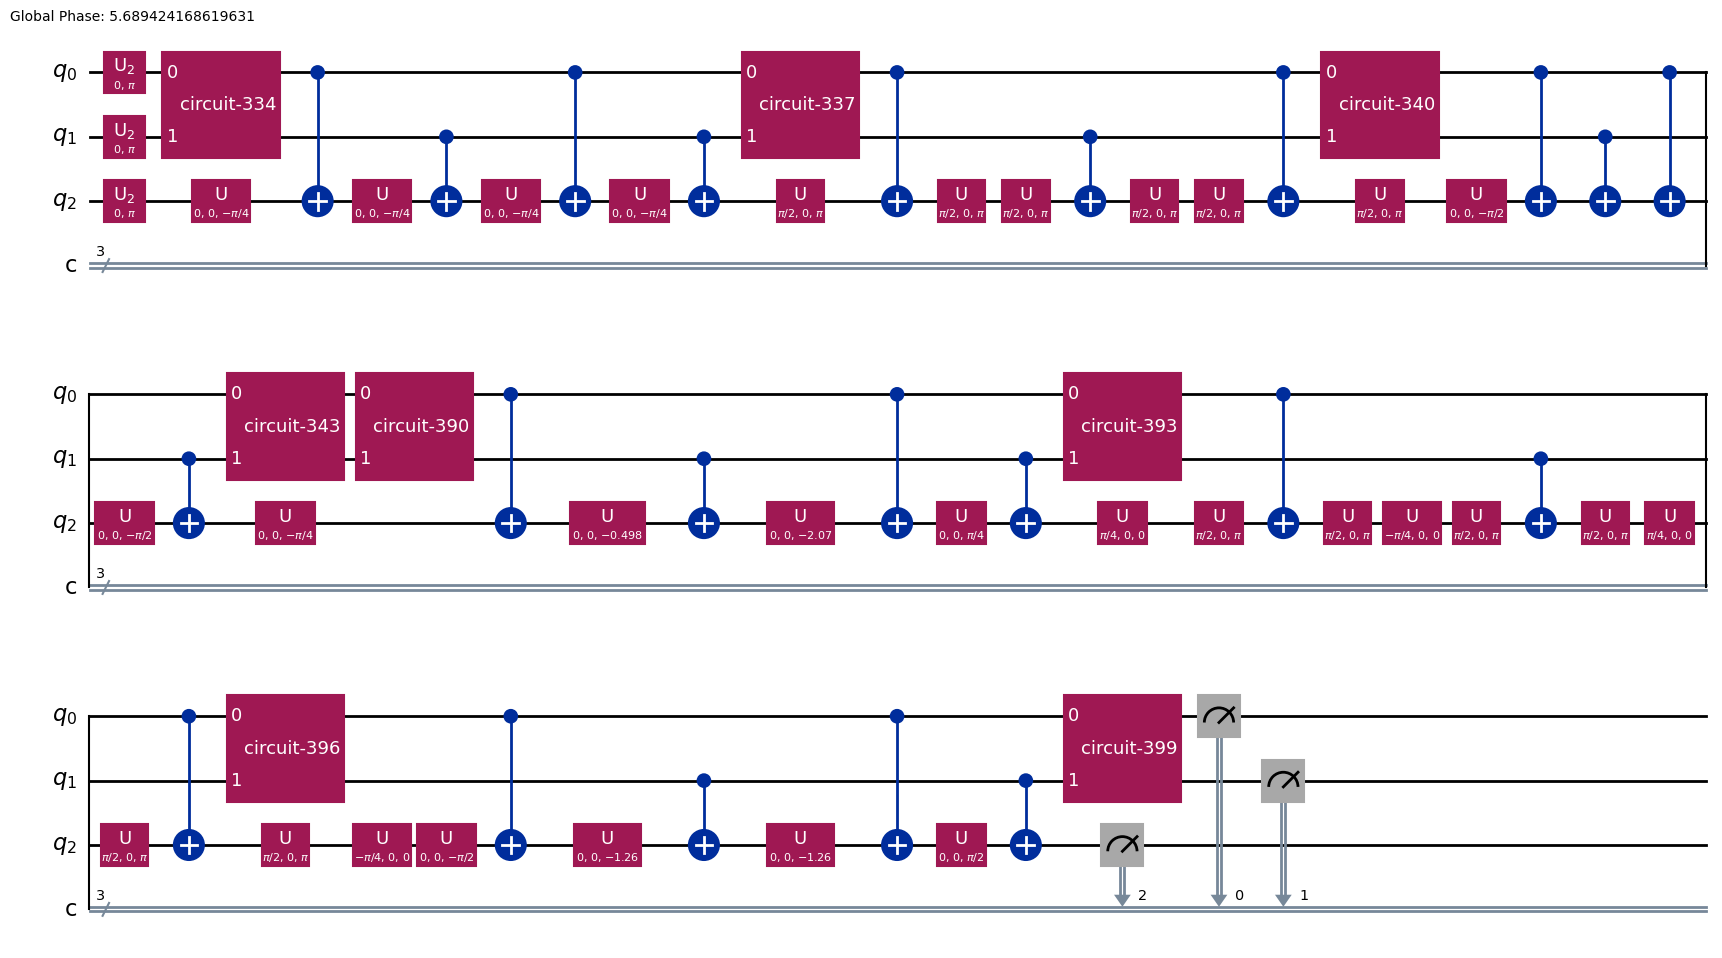

In [52]:
qc.decompose().draw('mpl')

In [53]:
# 시뮬레이터 설정: Aer의 qasm_simulator 사용
simulator = Aer.get_backend('qasm_simulator')

# 회로 실행: 1024번 샷으로 시뮬레이션
job = simulator.run(qc, shots=1024)

# 결과 가져오기
result = job.result()
counts = result.get_counts(qc)

# 결과 출력: 각 상태의 측정 횟수
print("Measurement counts:", counts)

Measurement counts: {'000': 27, '010': 32, '001': 38, '100': 30, '101': 35, '110': 32, '011': 29, '111': 801}


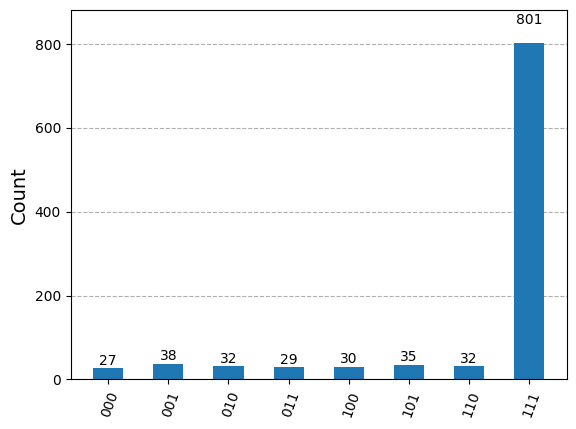

In [54]:
plot_histogram(counts)